In [22]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [23]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        result=np.array([])

        stft=np.abs(librosa.stft(X))

        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
            
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
       
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        
       
    return result

In [24]:
#Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#Emotions to observe
# observed_emotions=['neutral','calm','happy','sad','angry','fearful','disgust','surprised']
observed_emotions=['neutral',
  'calm',
  'happy',
  'sad',
  'angry']


In [25]:
#Load the data and extract features for each sound file
from fileinput import filename


def load_data():
    x,y=[],[]
    for file in glob.glob("D:\\Speech_recognition_prjoect\\dataset\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        # feature=extract_feature(file, mfcc=True, chroma=True, mel=True, contrast=True, tonnetz=True)
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return x,y

x,y=load_data()

In [26]:
#Split the dataset
test_size=0.2
x_train,x_test,y_train,y_test=train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')
from IPython.core.display import HTML 
# Center matplotlib figures...
HTML("""

.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

""")

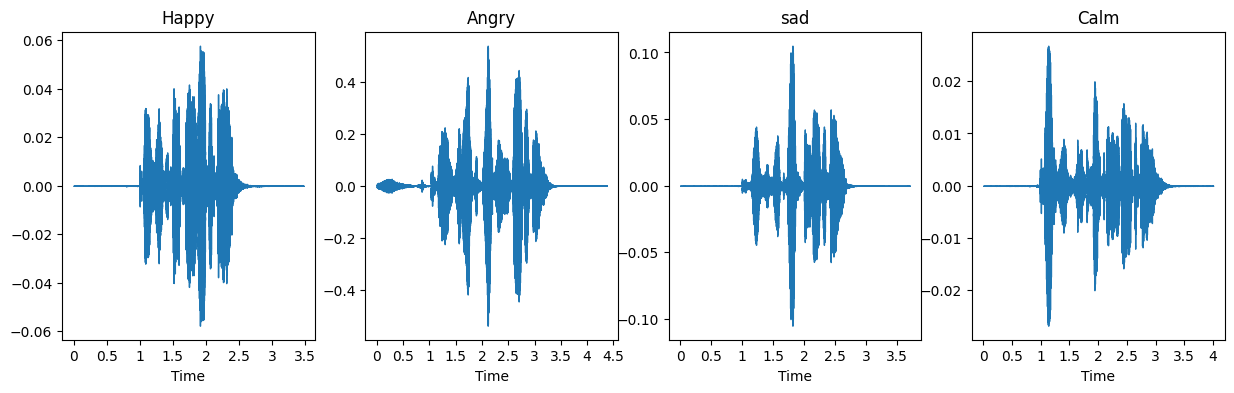

In [28]:
with soundfile.SoundFile('.\\dataset\\Actor_01\\03-01-03-01-01-01-01.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 4, 1)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Happy')

with soundfile.SoundFile('.\\dataset\\Actor_01\\03-01-05-02-01-02-01.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(1, 4, 2)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Angry')
with soundfile.SoundFile('.\\dataset\\Actor_01\\03-01-04-02-01-02-01.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(1, 4, 3)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('sad')
with soundfile.SoundFile('.\\dataset\\Actor_01\\03-01-02-02-01-02-01.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(1, 4, 4)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Calm')


In [29]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

(691, 173)
Features extracted: 180


In [30]:
print(f'\nAudio samples represented: {np.array(x).shape[0]}')
print(f'Numerical features extracted per sample: {np.array(x).shape[1]}')
features_df = pd.DataFrame(np.array(x)) # make it pretty for display
features_df



Audio samples represented: 864
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.633735,0.648761,0.621744,0.634553,0.660346,0.660464,0.700949,0.731556,0.746922,0.723420,...,0.000008,0.000006,0.000004,0.000004,0.000004,0.000004,0.000003,0.000004,0.000002,7.833277e-07
1,0.660001,0.708244,0.706755,0.675407,0.697954,0.732839,0.718030,0.761601,0.790468,0.789513,...,0.000016,0.000007,0.000005,0.000005,0.000003,0.000004,0.000005,0.000004,0.000002,1.019206e-06
2,0.689812,0.720044,0.702666,0.720143,0.716277,0.691080,0.704064,0.748578,0.798809,0.800498,...,0.000068,0.000042,0.000023,0.000030,0.000025,0.000020,0.000013,0.000010,0.000005,1.851122e-06
3,0.724800,0.711110,0.700211,0.719807,0.744759,0.749602,0.744019,0.791195,0.806003,0.761234,...,0.000053,0.000022,0.000015,0.000013,0.000021,0.000027,0.000024,0.000011,0.000008,5.017971e-06
4,0.603868,0.626373,0.696484,0.688915,0.679974,0.692953,0.699750,0.720744,0.734568,0.747884,...,0.000015,0.000007,0.000007,0.000005,0.000006,0.000005,0.000005,0.000003,0.000002,1.469757e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0.573345,0.552434,0.496275,0.471995,0.532256,0.596070,0.619582,0.690284,0.653540,0.663703,...,0.003460,0.003341,0.004875,0.003655,0.002755,0.002225,0.001649,0.001408,0.000797,4.811620e-04
860,0.527375,0.584111,0.553487,0.479401,0.464217,0.478122,0.498841,0.510498,0.529486,0.520460,...,0.001171,0.001391,0.001534,0.001672,0.001848,0.001874,0.001843,0.002616,0.001954,1.283527e-03
861,0.562189,0.589179,0.494924,0.441010,0.441746,0.488660,0.481254,0.476875,0.527713,0.484182,...,0.001457,0.001515,0.001588,0.001535,0.001425,0.000862,0.000849,0.000533,0.000326,1.899182e-04
862,0.626775,0.626583,0.568504,0.563255,0.522310,0.565010,0.617686,0.569738,0.550732,0.551326,...,0.002581,0.002971,0.002451,0.002658,0.002669,0.003121,0.002604,0.002092,0.001750,1.128139e-03


_______________________________________________________________________________________
MLP Classifier Implementation

In [31]:
if os.path.exists("trained_model"):
    print("loading trained model")
    MLP_model = pickle.load(open("trained_model","rb"))
else:
#Initialize the Multi Layer Perceptron Classifier
    MLP_model=MLPClassifier(alpha=0.01,batch_size=691,activation="logistic",solver="adam", epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=500)
    #Train the MLP_model
    MLP_model.fit(x_train,y_train)
    print("Model Loss:",MLP_model.loss_)
    print("Minimum loss:",MLP_model.best_loss_)
    print("loss curve:",MLP_model.loss_curve_)
    print("loss curve:",MLP_model.n_outputs_)

    with open("trained_model","wb") as file:
        pickle.dump(MLP_model, file)

loading trained model


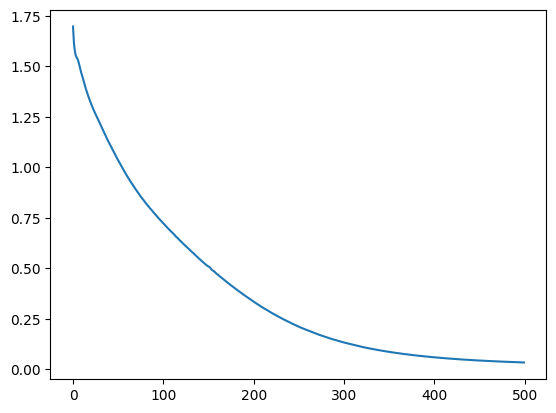

In [32]:
import matplotlib.pyplot as plt
plt.plot(MLP_model.loss_curve_)
plt.show()

In [33]:
#Predict for the test set
y_pred=MLP_model.predict(x_test)
#Calculate the accuracy of our MLP_model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 79.19%


___________________________________________________________________________

SVM Implementation

In [43]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(x), y, test_size=test_size, random_state=9)
 
# Feature Scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 
# Training a SVM_model classifier using SVC class
SVM_model = SVC(kernel= 'linear', random_state=1, C=0.1)
SVM_model.fit(X_train_std, y_train)
 
# SVM_model Model performance
Y_pred = SVM_model.predict(X_test_std)
print('Accuracy: %.2f' % (accuracy_score(Y_test, Y_pred)*100))

Accuracy: 60.69


_______________________________________________________________________________

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.91      0.75      0.82        40
        calm       0.77      0.89      0.82        37
       happy       0.76      0.85      0.80        40
     neutral       0.56      0.59      0.57        17
         sad       0.88      0.77      0.82        39

    accuracy                           0.79       173
   macro avg       0.77      0.77      0.77       173
weighted avg       0.80      0.79      0.79       173



In [37]:
#Detected feature for the data from user
def get_emotion():
    for detect_file in glob.glob("dataset\\userdata\\*.wav"):
        # detected_feature=extract_feature(detect_file, mfcc=True, chroma=True, mel=True, contrast=True, tonnetz=True)
        detected_feature=extract_feature(detect_file, mfcc=True, chroma=True, mel=True)
        print(detect_file)
        detected_feature=detected_feature.reshape(1, -1)
        prdicted_emotion=MLP_model.predict(detected_feature)
    return(prdicted_emotion)


In [38]:
import random 
import pyttsx3
import datetime
import speech_recognition as sr
import wikipedia
import webbrowser
import os
import sys
import smtplib
import glob


In [39]:
engine=pyttsx3.init('sapi5')
voices=engine.getProperty('voices')
#print(voices[0].id)
engine.setProperty('voice',voices[1].id)

def speak(audio):
    engine.say(audio)
    engine.runAndWait()

In [40]:
def wishMe():
    hour=int(datetime.datetime.now().hour)
    if(hour>=0 and hour<12):
        speak("Good Morning!")
    elif(hour>=12 and hour<=18):
        speak("Good Afternoon!")
    else:
        speak("Good Evening!")
    
    speak("I am your Assistant! What's your command today!")

In [41]:
def takeCommand():
    try:
        r = sr.Recognizer()
        with sr.Microphone() as source:
            print("Listening...")
            r.pause_threshold=0.5
            r.energy_threshold=200
            audio = r.listen(source, timeout=2, phrase_time_limit=4)
        fname="microphone-"+str(random.random())+".wav"
        f= open("dataset/userdata/"+fname, "wb")
        f.write(audio.get_wav_data())

        print("Recognizing....")
        query = r.recognize_google(audio,language="en-in")

    except Exception as e:
        #print(e)
        print("Sorry!! Can you say that again please....")
        speak("Sorry!! Can you say that again please....")
        query=''
    finally:
        return query

In [62]:
if __name__=="__main__":
    wishMe()
    val=True
    while val:
        query=takeCommand().lower()
        print(query)
        if query=="":
            for detect_file in glob.glob("dataset\\userdata\\*.wav"):
                os.remove(detect_file)
            continue

        if "play music" in query:
            lst =['calm','happy','sad','neutral']
            fetch_emotion=get_emotion()
            print(fetch_emotion)
            if fetch_emotion[0] in lst:
                songs=os.listdir("music_dir\\"+ fetch_emotion[0])
                print(songs)
                os.system("music_dir\\" + fetch_emotion[0] + "\\"+ songs[0])
            else:
                songs=os.listdir("music_dir\\default")
                os.system("music_dir\\default\\"+ songs[0])
            val=False
        elif "my mood" in query:
            fetch_emotion=get_emotion()
            speak("Hmm... I think... you are "+fetch_emotion[0]+" now!!")
            speak("What can I do for you!!")

        elif "exit" in query:
            val=False

        for detect_file in glob.glob("dataset\\userdata\\*.wav"):
            os.remove(detect_file)	
        




Listening...
Recognizing....
how was my mood
dataset\userdata\microphone-0.20401067188455646.wav
Listening...
Recognizing....
music
Listening...
Recognizing....
Sorry!! Can you say that again please....

Listening...
Recognizing....
play music
dataset\userdata\microphone-0.5641202088498285.wav
['angry']
